# Libraries

In [1]:
import h5py                                                                     # Library to work with hdf5 files
import numpy as np                                                              # Library to work with data
import pandas as pd                                                             # Library to work with data
import matplotlib.pyplot as plt                                                 # Library to visualize data

In [2]:
list_sim = ["RefL0012N0188", "RefL0025N0376","RefL0050N0752", "RecalL0025N0752"]
sim = list_sim[2]

# Load the database

In [3]:
f    =  h5py.File('/content/drive/MyDrive/TFG/Mi_Produccion/Data_base/TFG_%s.h5'%(sim), 'r')
simf = f['%s'%(sim)]
simf.attrs.keys()

<KeysViewHDF5 ['GasSpin_z', 'KappaCoRot', 'Mass', 'MassStar', 'Snap_0_angular', 'Snap_0_mass', 'Snap_0_overrho', 'Snap_0_rho', 'Vmax', 'center_mass', 'radio_sphere']>

In [4]:
atrib = lambda att: f['%s'%(sim)].attrs.get(att)

In [5]:
np.mean(atrib('radio_sphere'))

0.00913596232822678

# Visualización

# Overrho visualizacion

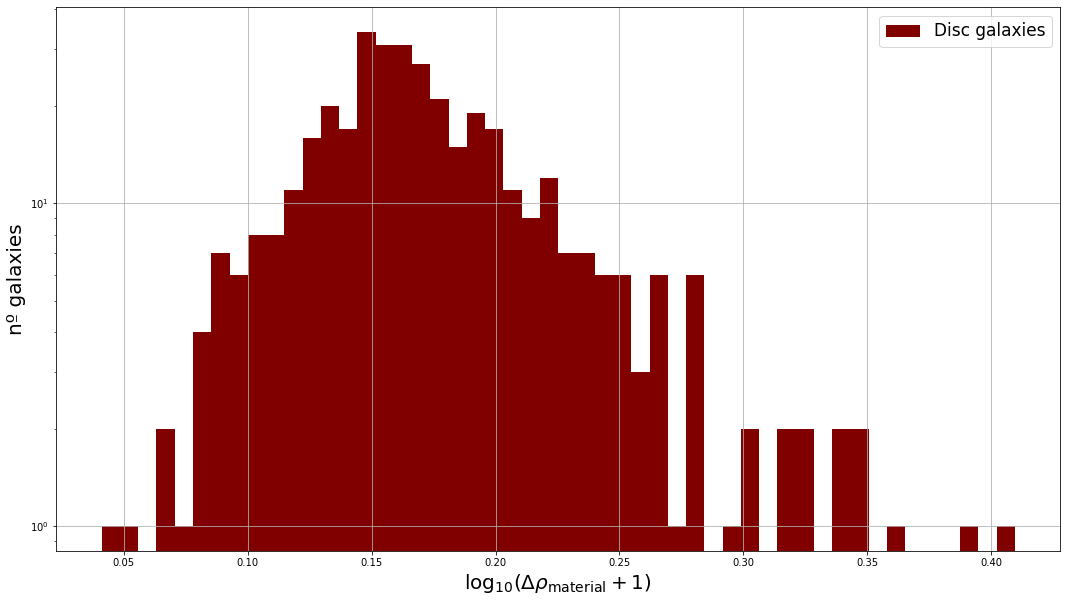

In [29]:
fig_hist_all= plt.figure(figsize=(18,10))
ax_hist     = fig_hist_all.add_subplot(111)

# Data
ax_hist.hist(np.log(atrib('Snap_0_overrho')+1), bins=50, color= 'maroon', label='Disc galaxies')

#label
ax_hist.set_xlabel(r'$\log_{10}(\Delta\rho_{\mathrm{material}}+1)$', fontsize=20)
ax_hist.set_ylabel(r'nº galaxies', fontsize=20)
ax_hist.legend(fontsize=17)
ax_hist.grid()
ax_hist.set_yscale('log')


plt.show()

In [7]:
print(np.mean(np.log10(atrib('Snap_0_overrho')+1)), np.max(atrib('Snap_0_overrho')))

0.07563984250178223 0.5059470518842452


# Overdensity-V_max

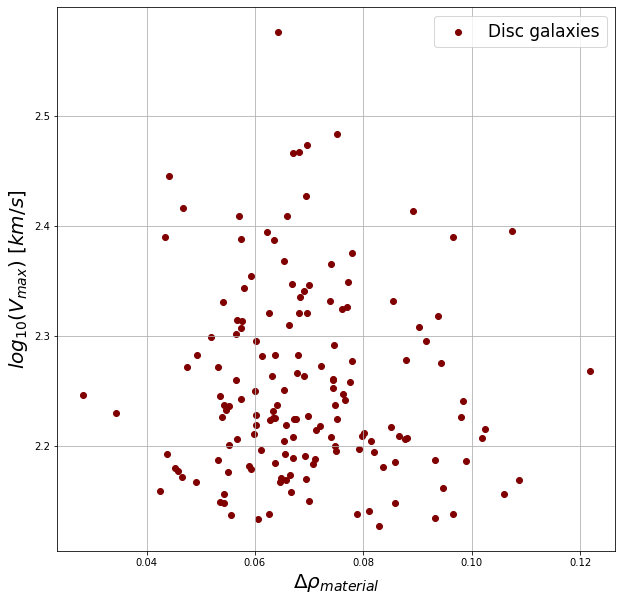

In [8]:
fig_hist_all= plt.figure(figsize=(10,10))
ax     = fig_hist_all.add_subplot(111)

# Data
ax.scatter(np.log10(atrib('Snap_0_overrho')[atrib('MassStar')>1e10]+1), np.log10(atrib('Vmax')[atrib('MassStar')>1e10]), color= 'maroon', label='Disc galaxies')

#label
ax.set_xlabel(r'$\Delta\rho_{material}$', fontsize=20)
ax.set_ylabel(r'$log_{10}(V_{max})$ $[km/s]$', fontsize=20)
ax.legend(fontsize=17)
ax.grid()


plt.show()

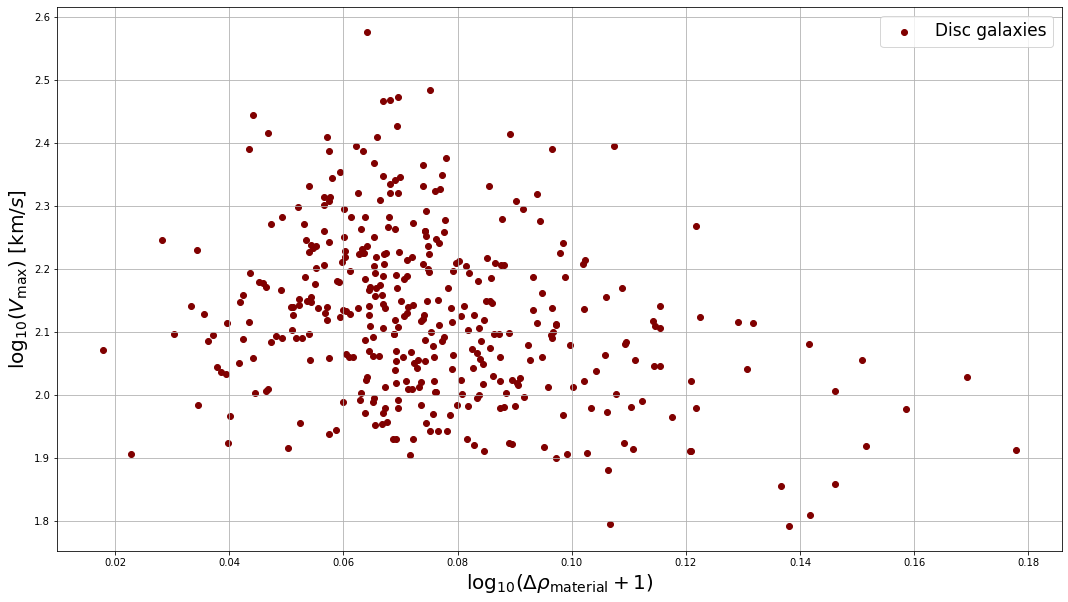

In [32]:
fig_hist_all= plt.figure(figsize=(18,10))
ax     = fig_hist_all.add_subplot(111)

# Data
ax.scatter(np.log10(atrib('Snap_0_overrho')+1), np.log10(atrib('Vmax')), 
           color= 'maroon', label='Disc galaxies')

#label
ax.set_xlabel(r'$\log_{10}(\Delta\rho_{\mathrm{material}}+1)$', fontsize=20)
ax.set_ylabel(r'$\log_{10}(V_{\mathrm{max}})$ $[\mathrm{km}/s]$', fontsize=20)
ax.legend(fontsize=17)
ax.grid()


plt.show()

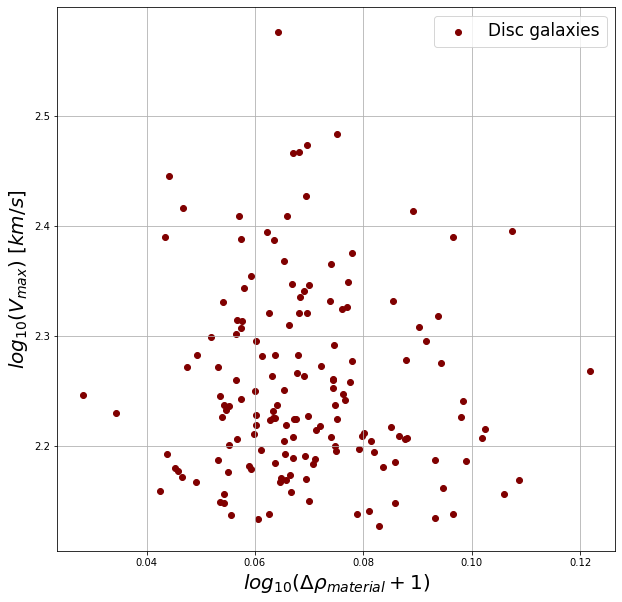

In [10]:
fig_hist_all= plt.figure(figsize=(10,10))
ax     = fig_hist_all.add_subplot(111)

# Data
ax.scatter(np.log10(atrib('Snap_0_overrho')[atrib('MassStar')>1e10]+1), np.log10(atrib('Vmax')[atrib('MassStar')>1e10]), 
           color= 'maroon', label='Disc galaxies')

#label
ax.set_xlabel(r'$log_{10}(\Delta\rho_{material}+1)$', fontsize=20)
ax.set_ylabel(r'$log_{10}(V_{max})$ $[km/s]$', fontsize=20)
ax.legend(fontsize=17)
ax.grid()


plt.show()

# Overdensity-radio_sphere

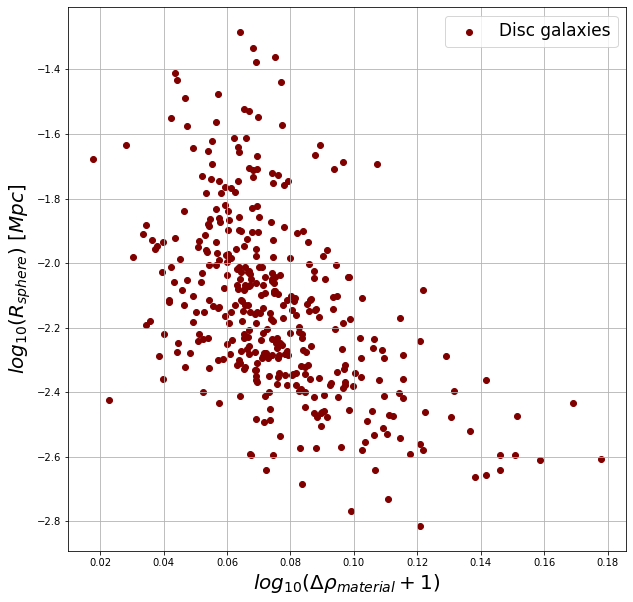

In [11]:
fig_hist_all= plt.figure(figsize=(10,10))
ax     = fig_hist_all.add_subplot(111)

# Data
ax.scatter(np.log10(atrib('Snap_0_overrho')+1), np.log10(atrib('radio_sphere')), 
           color= 'maroon', label='Disc galaxies')

#label
ax.set_xlabel(r'$log_{10}(\Delta\rho_{material}+1)$', fontsize=20)
ax.set_ylabel(r'$log_{10}(R_{sphere})$ $[Mpc]$', fontsize=20)
ax.legend(fontsize=17)
ax.grid()


plt.show()

# radio_sphere - V_max

[ 1.78474039 -5.93280034]


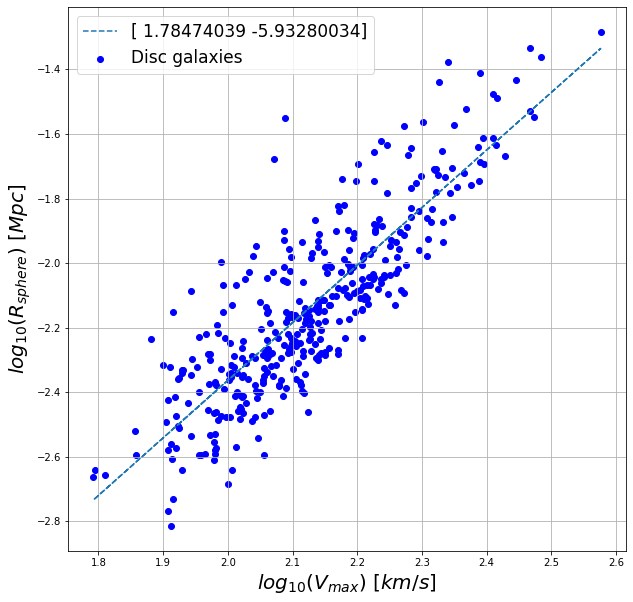

In [12]:
fig_hist_all= plt.figure(figsize=(10,10))
ax     = fig_hist_all.add_subplot(111)

fit = np.polyfit(np.log10(atrib('Vmax')), np.log10(atrib('radio_sphere')), 1)
print(fit)

# Data
ax.scatter(np.log10(atrib('Vmax')), np.log10(atrib('radio_sphere')), 
           color= 'blue', label='Disc galaxies')

ax.plot(np.log10(atrib('Vmax')), np.log10(atrib('Vmax'))*fit[0] + fit[1], '--', label=fit)

#label
ax.set_xlabel(r'$log_{10}(V_{max})$ $[km/s]$', fontsize=20)
ax.set_ylabel(r'$log_{10}(R_{sphere})$ $[Mpc]$', fontsize=20)
ax.legend(fontsize=17)
ax.grid()


plt.show()

# Vmax - Snap_0_mass

[ 2.62438421 -3.5327875 ]


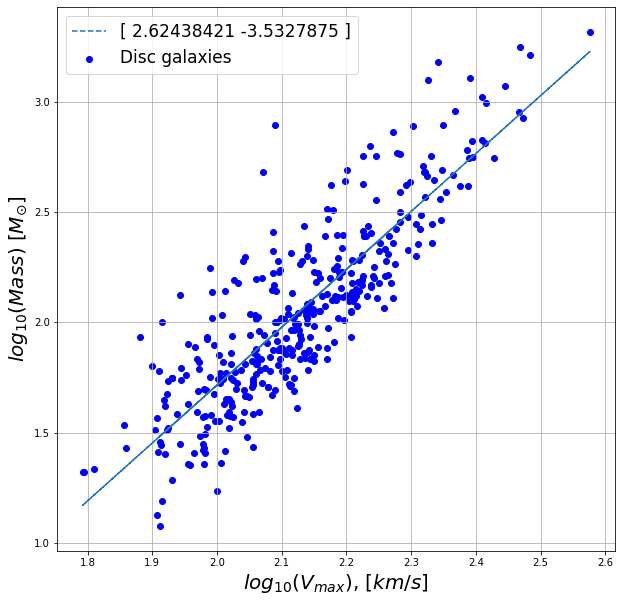

In [13]:
fig_hist_all= plt.figure(figsize=(10,10))
ax     = fig_hist_all.add_subplot(111)

fit = np.polyfit(np.log10(atrib('Vmax')), np.log10(atrib('Snap_0_mass')), 1)
print(fit)

# Data
ax.scatter(np.log10(atrib('Vmax')), np.log10(atrib('Snap_0_mass')), 
           color= 'blue', label='Disc galaxies')

ax.plot(np.log10(atrib('Vmax')), np.log10(atrib('Vmax'))*fit[0] + fit[1], '--', label=fit)

#label
ax.set_xlabel(r'$log_{10}(V_{max})$, $[km/s]$', fontsize=20)
ax.set_ylabel(r'$log_{10}(Mass)$ $[M_{\odot}]$', fontsize=20)
ax.legend(fontsize=17)
ax.grid()


plt.show()

# Representación para TFG

[ 0.89237019 -2.96640017]
[ 2.62438421 -3.5327875 ]


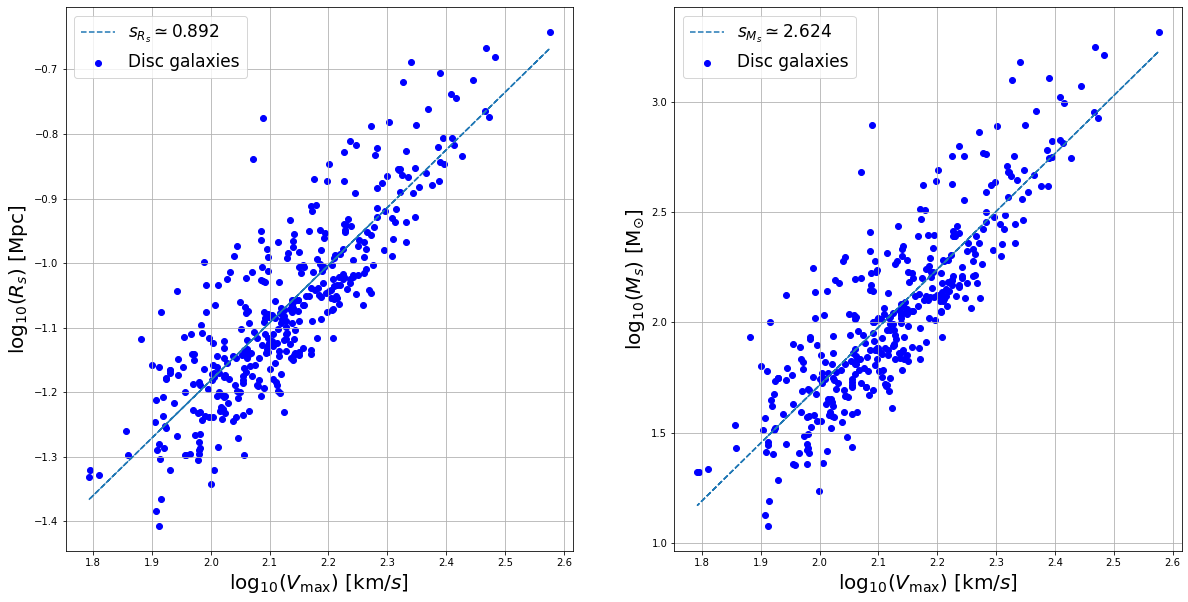

In [38]:
fig_hist_all= plt.figure(figsize=(20,10))

ax     = fig_hist_all.add_subplot(121)

fit = np.polyfit(np.log10(atrib('Vmax')), np.log10(np.sqrt(atrib('radio_sphere'))), 1)

# Data
ax.scatter(np.log10(atrib('Vmax')), np.log10(np.sqrt(atrib('radio_sphere'))), 
           color= 'blue', label='Disc galaxies')

ax.plot(np.log10(atrib('Vmax')), np.log10(atrib('Vmax'))*fit[0] + fit[1], '--', label= r'$s_{R_{s}} \simeq $' + str(fit[0])[0:5])

print(fit)

#label
ax.set_xlabel(r'$\log_{10}(V_{\mathrm{max}})$ $[\mathrm{km}/s]$', fontsize=20)
ax.set_ylabel(r'$\log_{10}(R_{s})$ $[\mathrm{Mpc}]$', fontsize=20)
ax.legend(fontsize=17)
ax.grid()

ax     = fig_hist_all.add_subplot(122)

fit = np.polyfit(np.log10(atrib('Vmax')), np.log10(atrib('Snap_0_mass')), 1)

# Data
ax.scatter(np.log10(atrib('Vmax')), np.log10(atrib('Snap_0_mass')), 
           color= 'blue', label='Disc galaxies')

ax.plot(np.log10(atrib('Vmax')), np.log10(atrib('Vmax'))*fit[0] + fit[1], '--', label= r'$s_{M_{s}} \simeq $' + str(fit[0])[0:5])

print(fit)

#label
ax.set_xlabel(r'$\log_{10}(V_{\mathrm{max}})$ $[\mathrm{km}/s]$', fontsize=20)
ax.set_ylabel(r'$\log_{10}(M_{s})$ $[\mathrm{M}_{\odot}]$', fontsize=20)
ax.legend(fontsize=17)
ax.grid()


plt.show()

M_s frente R_s

[ 0.34227357 -1.76973811]


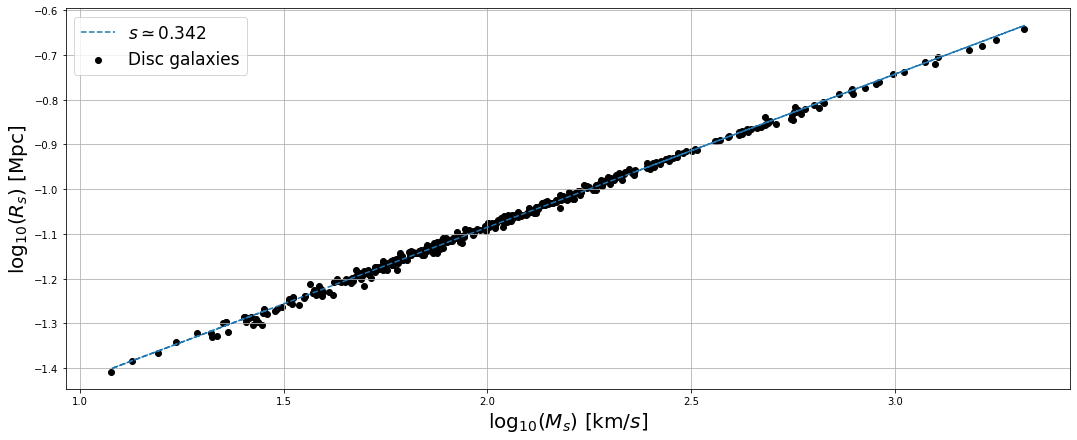

In [39]:
fig_hist_all= plt.figure(figsize=(18,7))

ax     = fig_hist_all.add_subplot(111)

fit = np.polyfit(np.log10(atrib('Snap_0_mass')), np.log10(np.sqrt(atrib('radio_sphere'))), 1)

# Data
ax.scatter(np.log10(atrib('Snap_0_mass')), np.log10(np.sqrt(atrib('radio_sphere'))), 
           color= 'black', label='Disc galaxies')

ax.plot(np.log10(atrib('Snap_0_mass')), np.log10(atrib('Snap_0_mass'))*fit[0] + fit[1], '--', label= r'$s \simeq $' + str(fit[0])[0:5])

print(fit)

#label
ax.set_xlabel(r'$\log_{10}(M_{s})$ $[\mathrm{km}/s]$', fontsize=20)
ax.set_ylabel(r'$\log_{10}(R_{s})$ $[\mathrm{Mpc}]$', fontsize=20)
ax.legend(fontsize=17)
ax.grid()

# Comprobación de la densidad (Neo cálculo)

In [16]:
rho = atrib('Snap_0_mass')/((4/3)*np.pi*atrib('radio_sphere')**(3/2))           # M*/Mpc^3
rho *= 1.989e43/3.08e24**3                                                      # g/cm^3
rho[0]

3.237904636750779e-26

In [17]:
_ = atrib('Snap_0_mass')*1.989e43/((4/3)*np.pi*((atrib('radio_sphere'))**(1/2)*3.08e24)**3)
print(_[0])
atrib('Snap_0_rho')[0]

3.2379046367507795e-26


3.2379046367507795e-26

[ -0.05272637 -25.42269296]


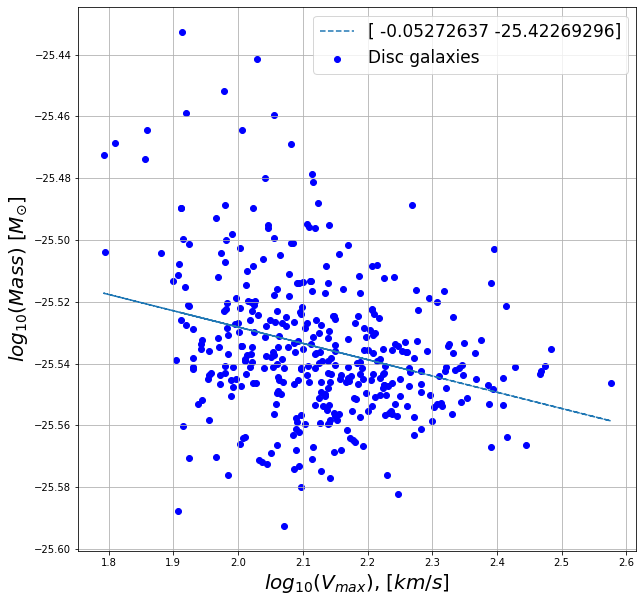

In [18]:
fig_hist_all= plt.figure(figsize=(10,10))
ax     = fig_hist_all.add_subplot(111)

fit = np.polyfit(np.log10(atrib('Vmax')), np.log10(rho), 1)
print(fit)

# Data
ax.scatter(np.log10(atrib('Vmax')), np.log10(rho), 
           color= 'blue', label='Disc galaxies')

ax.plot(np.log10(atrib('Vmax')), np.log10(atrib('Vmax'))*fit[0] + fit[1], '--', label=fit)

#label
ax.set_xlabel(r'$log_{10}(V_{max})$, $[km/s]$', fontsize=20)
ax.set_ylabel(r'$log_{10}(Mass)$ $[M_{\odot}]$', fontsize=20)
ax.legend(fontsize=17)
ax.grid()


plt.show()

# Vmax-radio_spher-Overrho

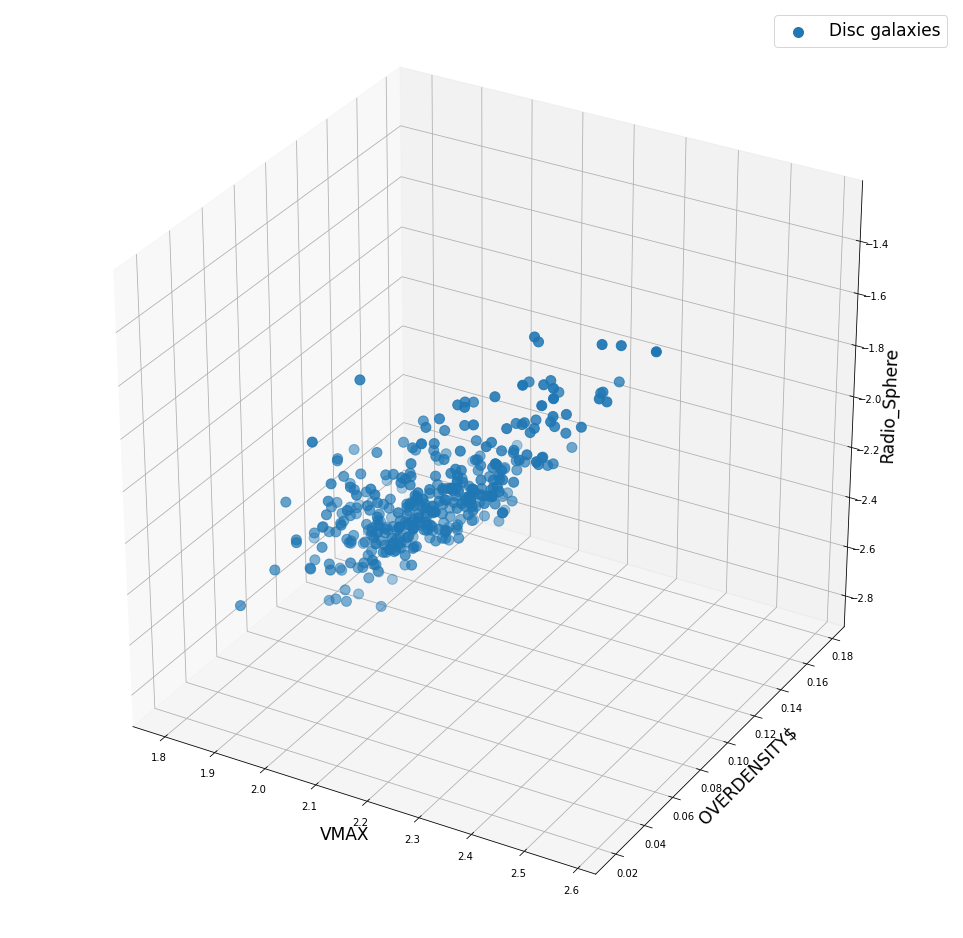

In [19]:
fig = plt.figure(figsize=(17,17))
ax = fig.gca(projection='3d')

color = ['darkorange', 'teal', 'grey', 'k']
alpha = [1, 1, 1, 1]

ax.scatter(xs= np.log10(atrib('Vmax')), 
           ys= np.log10(atrib('Snap_0_overrho')+1), 
           zs= np.log10(atrib('radio_sphere')), 
           s= 1e2, label='Disc galaxies')

ax.set_xlabel(r'VMAX', size=17)
ax.set_ylabel(r'OVERDENSITY$', size=17)
ax.set_zlabel(r'Radio_Sphere', size=17)

plt.legend(prop={'size': 17})
plt.show()

# Angular Momentum 

In [20]:
angular_0025_cm = np.array([[9.035, 8.053, 8.258],
                            [-0.1474, 1.878, 0.8931],
                            [8.4118, 7.2044, 8.9158],
                            [-6.1463, -6.6973, -10.00],
                            [10.3848, 5.1432, 8.8375]])

In [21]:
angular_0050 = np.array([[-68.16, -86.36, -81.99],
                         [-112.88, -100.73, -97.39],
                         [-50.26, -47.59, -97.39],
                         [-10.27, -19.67, -4.06],
                         [67.28, 61.45, 69.99],
                         [143.27, 157.49, 158.44],
                         [52.21, 53.64, 50.77],
                         [9.10, 14.16, 17.49],
                         [15.13, 8.85, 12.9],
                         [51.07, 50.91, 25.95],
                         [-7.62, -13.63, -7.26],
                         [5.84, 2.3, 11.0],
                         [-57.05, -60.11, -60.72],
                         [-29.67, -54.00, -33.82],
                         [89.85, 82.88, 84.98],
                         [-141.02, -130.63, -132.78],
                         [64.48, 56.50, 19.58],
                         [-96.89, -110.79, -112.23],
                         [89.85, 97.31, 94.42],
                         [19.38, 21.84, 27.40],
                         [54.49, 52.06, 41.62],
                         [55.69, 42.20, 38.47],
                         [-1.31, -18.04, -68.15],
                         [-151.57, -149.46, -148.43],
                         [-29.17, -39.158, -27.038],
                         [-95.04, -92.34, -95.101]])

In [22]:
abs_angular = np.sqrt(np.sum(atrib('Snap_0_angular')**2, axis= 1))
#abs_angular = np.sqrt(np.sum(angular_0025_cm**2, axis= 1))

## Angular momentum visualización

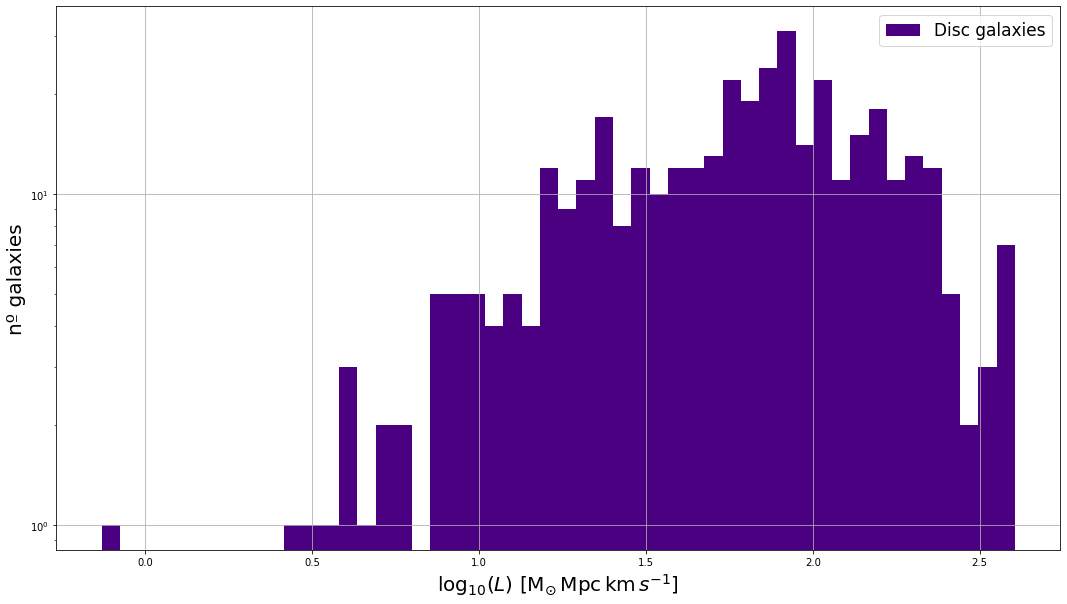

In [30]:
fig_hist_all= plt.figure(figsize=(18,10))
ax_hist     = fig_hist_all.add_subplot(111)

# Data
ax_hist.hist(np.log10(abs_angular), bins=50, color= 'indigo', label='Disc galaxies')

#label
ax_hist.set_xlabel(r'$\log_{10}(L)$ $[\mathrm{M}_{\odot}\, \mathrm{Mpc}\, \mathrm{km}\, s^{-1}]$', fontsize=20)
ax_hist.set_ylabel(r'nº galaxies', fontsize=20)
ax_hist.legend(fontsize=17)
ax_hist.grid()
ax_hist.set_yscale('log')


plt.show()

# Angular momentum - V_max

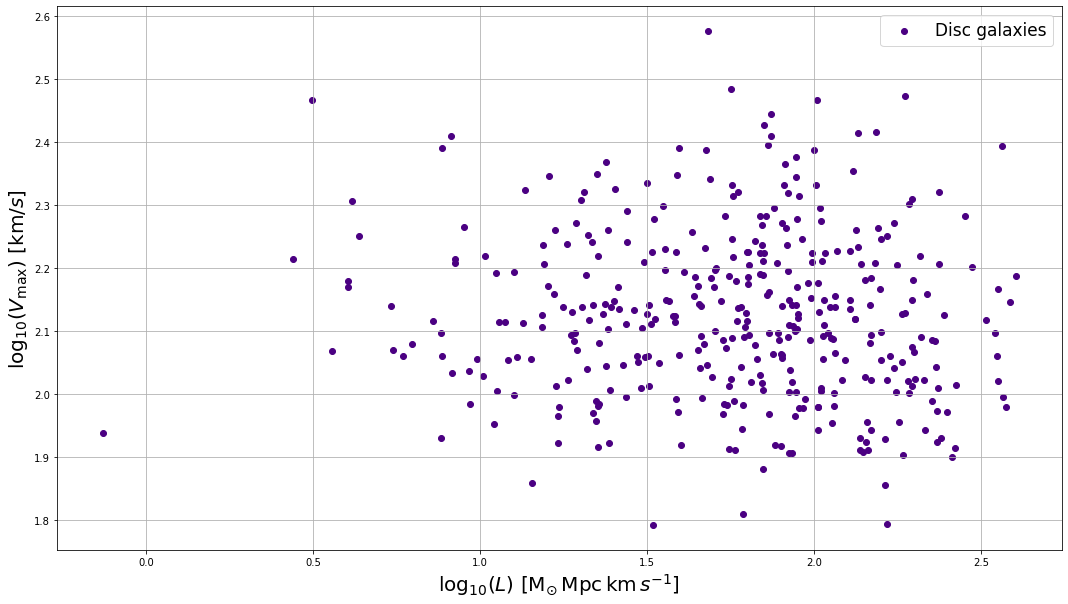

In [33]:
fig_hist_all= plt.figure(figsize=(18,10))
ax     = fig_hist_all.add_subplot(111)

# Data
ax.scatter(np.log10(abs_angular), np.log10(atrib('Vmax'))[:len(abs_angular)], color= 'indigo', label='Disc galaxies')

#label
ax.set_xlabel(r'$\log_{10}(L)$ $[\mathrm{M}_{\odot}\, \mathrm{Mpc}\, \mathrm{km}\, s^{-1}]$', fontsize=20)
ax.set_ylabel(r'$\log_{10}(V_{\mathrm{max}})$ $[\mathrm{km}/s]$', fontsize=20)
ax.legend(fontsize=17)
ax.grid()


plt.show()

# Angular momentum - Vmax - Overdensity

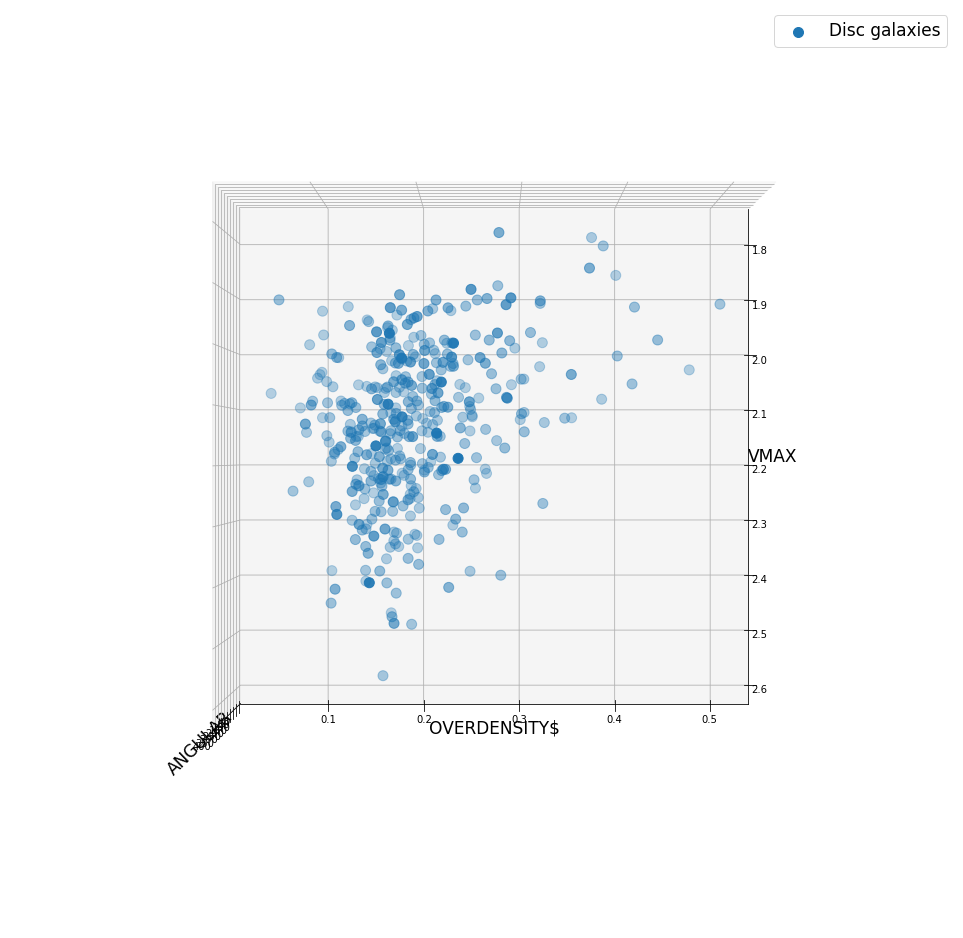

In [25]:
fig = plt.figure(figsize=(17,17))
ax = fig.gca(projection='3d')

color = ['darkorange', 'teal', 'grey', 'k']
alpha = [1, 1, 1, 1]

ax.scatter(xs= np.log10(atrib('Vmax'))[:len(abs_angular)], 
           ys= atrib('Snap_0_overrho')[:len(abs_angular)], 
           zs= abs_angular, 
           s= 1e2, label='Disc galaxies')

ax.set_xlabel(r'VMAX', size=17)
ax.set_ylabel(r'OVERDENSITY$', size=17)
ax.set_zlabel(r'ANGULAR', size=17)

plt.legend(prop={'size': 17})
ax.view_init(elev=90, azim=0)
plt.show()